In [1]:
import math
import time
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

import Scripts.fishUtilities as fu

from pathlib import Path

In [2]:
imagePath = r'./Pictures'
databasePath = r'./'
figurePath = r'/home/mco143/Documents/inkscape_drawings/imageSegmentation'
    
specimen = r'commonCarp'

In [3]:
imagePathSide = fu.get_image_files(imagePath, specimen + 'SideNF.png')
imagePathSideFull = fu.get_image_files(imagePath, specimen + 'Side.png')

# import images
imageSide = cv2.imread(imagePathSide[0].as_posix())
imageSideFull = cv2.imread(imagePathSideFull[0].as_posix())

imagePathTop = fu.get_image_files(imagePath, specimen + 'TopNF.png')
imagePathTopFull = fu.get_image_files(imagePath, specimen + 'Top.png')

if(len(imagePathTopFull) == 0):
    imagePathTopFull = imagePathTop

# import images
imageTop = cv2.imread(imagePathTop[0].as_posix())
imageTopFull = cv2.imread(imagePathTopFull[0].as_posix())

In [4]:
hsvSideFull = cv2.cvtColor(imageSideFull, cv2.COLOR_BGR2HSV)
# split the channels
h, s, v = cv2.split(hsvSideFull)
# Gaussian filter the s and v component
s = cv2.GaussianBlur(s, (3,3), 1)
v = cv2.GaussianBlur(v, (3,3), 1)
# append the images
hsvSideFull_processed = cv2.merge([h, s, v])

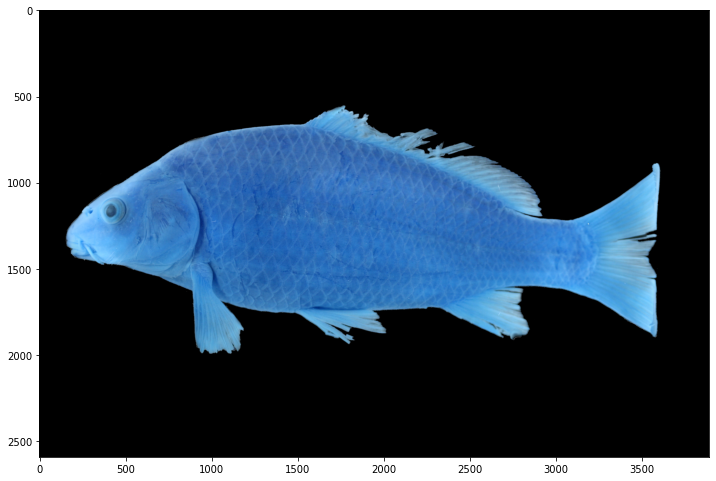

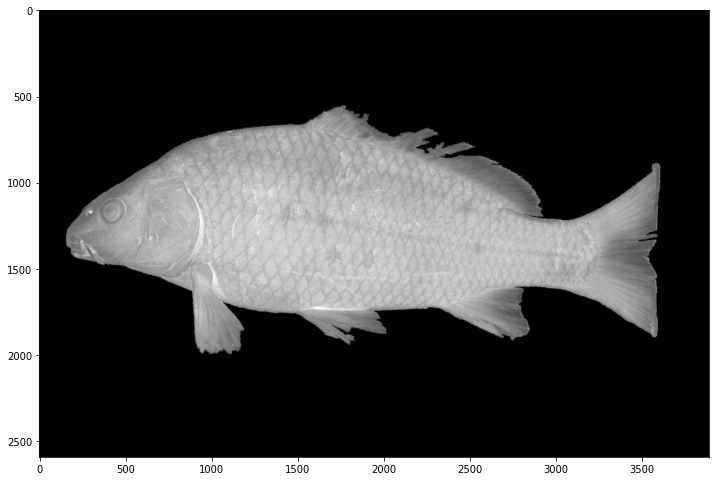

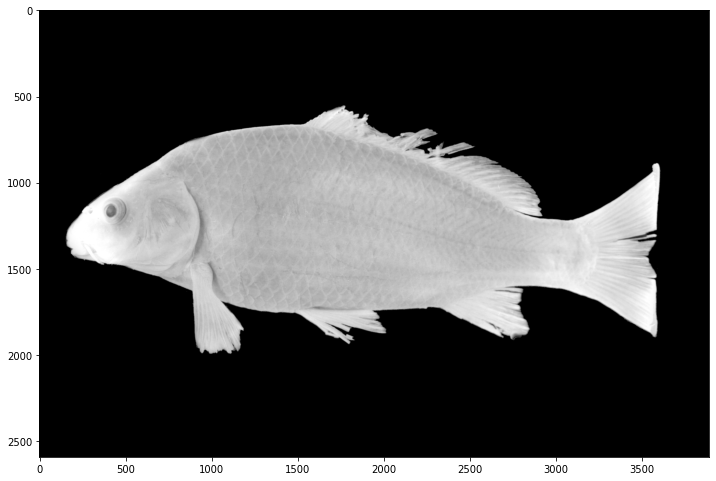

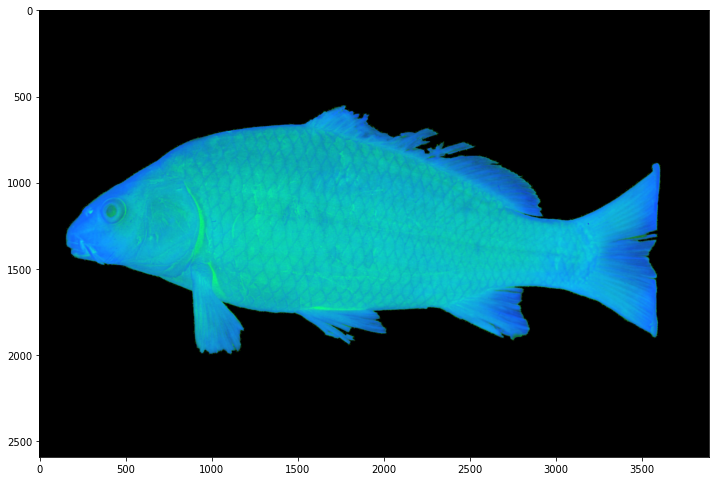

In [11]:
fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.imshow(imageSideFull)
fig1.savefig(Path(figurePath).joinpath('baseImage.png'), facecolor='w', bbox_inches='tight')

fig2, ax2 = plt.subplots(figsize=(12,10))
ax2.imshow(s, cmap='gray')
fig2.savefig(Path(figurePath).joinpath('sChannel.png'), facecolor='w', bbox_inches='tight')

fig3, ax3 = plt.subplots(figsize=(12, 10))
ax3.imshow(v, cmap='gray')
fig3.savefig(Path(figurePath).joinpath('vChannel.png'), facecolor='w', bbox_inches='tight')

fig4, ax4 = plt.subplots(figsize=(12, 10))
ax4.imshow(hsvSideFull_processed)
fig4.savefig(Path(figurePath).joinpath('hsvCombined.png'), facecolor='w', bbox_inches='tight')

In [6]:
# https://stackoverflow.com/questions/5906693/how-to-reduce-the-number-of-colors-in-an-image-with-opencv
def kmeans_color_quantization(image, clusters=2, rounds=1):
    Z = image.reshape((-1, 3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    compactness, labels, centers = cv2.kmeans(Z,
            clusters, 
            None,
            criteria, 
            rounds, 
            cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    return res.reshape((image.shape))

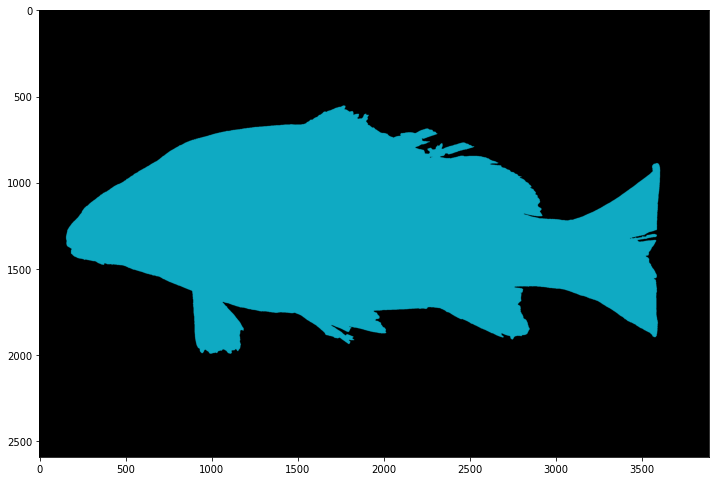

In [7]:
result = kmeans_color_quantization(hsvSideFull_processed)
fig5, ax5 = plt.subplots(figsize=(12,10))
ax5.imshow(result)
fig5.savefig(Path(figurePath).joinpath('kMeans.png'), facecolor='w', bbox_inches='tight')

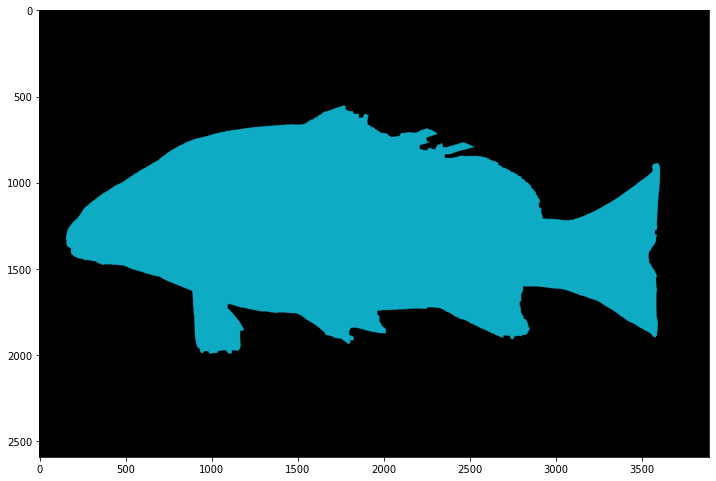

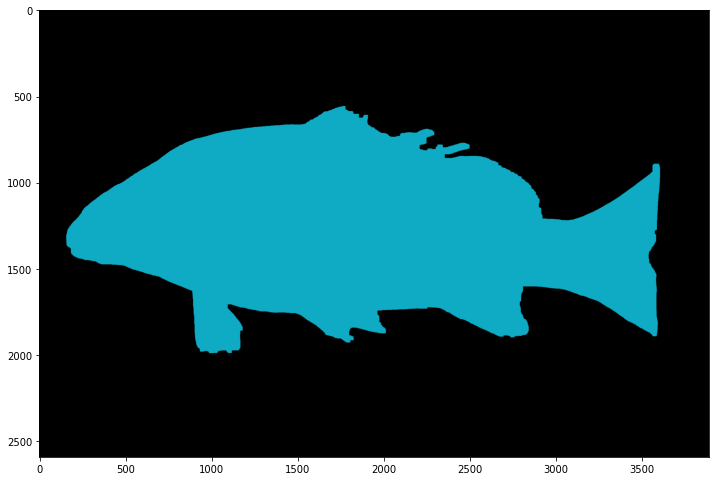

In [8]:
kernal = np.ones((21,21), np.uint8)
# Morphological Close
closeImg = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernal)
fig6, ax6 = plt.subplots(figsize=(12,10))
ax6.imshow(closeImg)
#fig6.savefig(Path(figurePath).joinpath('closeImg.png'), facecolor='w', bbox_inches='tight')

# Morhpological Open
openImg = cv2.morphologyEx(closeImg, cv2.MORPH_OPEN, kernal)
fig7, ax7 = plt.subplots(figsize=(12,10))
ax7.imshow(openImg)
fig7.savefig(Path(figurePath).joinpath('openImg.png'), facecolor='w', bbox_inches='tight')

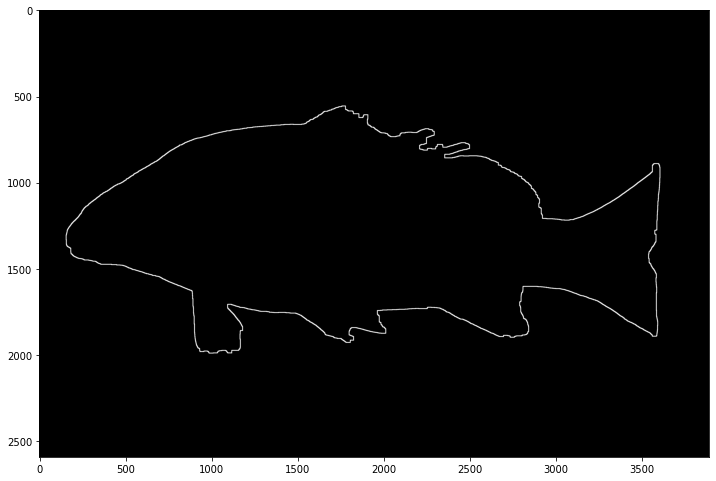

In [9]:
edged = cv2.Canny(openImg,100, 200)
edged_dialate = cv2.dilate(edged, np.ones((5,5), 'uint8'), iterations=1)
fig8, ax8 = plt.subplots(figsize=(12,10))
ax8.imshow(edged_dialate, cmap="gray")
fig8.savefig(Path(figurePath).joinpath('cannyEdge.png'), facecolor='w', bbox_inches='tight')

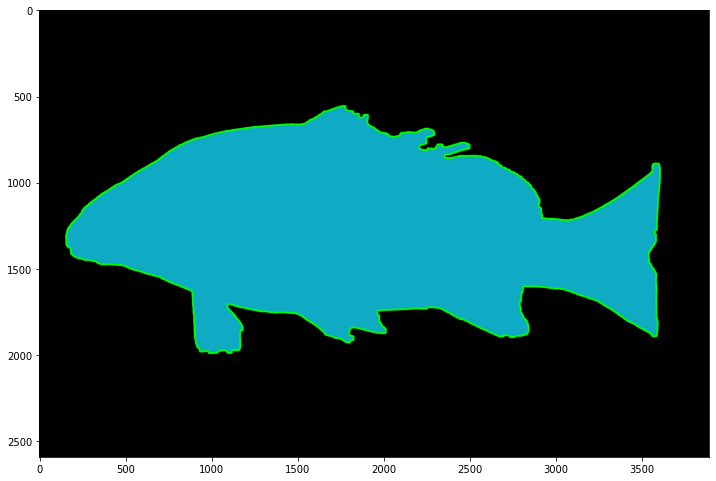

In [10]:
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cnts = sorted(contours, key=cv2.contourArea, reverse=True)

cv2.drawContours(openImg, contours, 0, (0, 255, 0), 10)

fig9, ax9 = plt.subplots(figsize=(12,10))
ax9.imshow(openImg)
fig9.savefig(Path(figurePath).joinpath('finalImage.png'), facecolor='w', bbox_inches='tight')